In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/fake-news/train.csv')

In [3]:
import regex as re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix
import matplotlib.pyplot as plt

In [4]:
train.fillna('Not Available', inplace=True)

In [5]:
for col in ['title', 'author', 'text']:
    train[col] = train[col].apply(lambda x : re.sub('[^a-z,A-Z]', ' ', x).lower())

train.head()

,id,title,author,text,label
0,0,house dem aide we didn t even see comey s let...,darrell lucus,house dem aide we didn t even see comey s let...,1
1,1,"flynn hillary clinton, big woman on campus ...",daniel j flynn,ever get the feeling your life circles the rou...,0
2,2,why the truth might get you fired,consortiumnews com,"why the truth might get you fired october , ...",1
3,3,civilians killed in single us airstrike hav...,jessica purkiss,videos civilians killed in single us airstr...,1
4,4,iranian woman jailed for fictional unpublished...,howard portnoy,print an iranian woman has been sentenced to ...,1


In [6]:
# Considering all features
train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']

In [7]:
# tf-idf
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(train['total'].values)

In [8]:
y = train['label'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [10]:
# MultinomialNB with default parameter value
classifier=MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
print('Validation Accuracy: {:.2f} Validation Precision: {:.2f} Validation Recall: {:.2f}'.format(
    accuracy_score(y_pred, y_test),
    precision_score(y_pred, y_test),
    recall_score(y_pred, y_test)
))

Validation Accuracy: 0.91 Validation Precision: 0.88 Validation Recall: 0.93


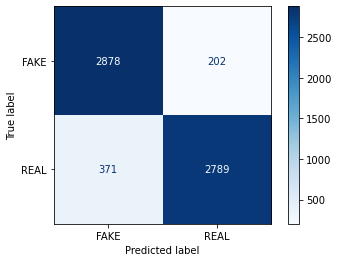

In [13]:
clf = plot_confusion_matrix(classifier, X_test, y_test,
                      display_labels=['FAKE', 'REAL'],
                      cmap=plt.cm.Blues,
                      normalize=None)

plt.show()

In [14]:
test = pd.read_csv('/kaggle/input/fake-news/test.csv')

In [15]:
test.fillna('Not Available', inplace=True)

In [16]:
for col in ['title', 'author', 'text']:
    test[col] = test[col].apply(lambda x : re.sub('[^a-z,A-Z]', ' ', x).lower())

test.head()

,id,title,author,text
0,20800,"specter of trump loosens tongues, if not purse...",david streitfeld,"palo alto, calif after years of scorning..."
1,20801,russian warships ready to strike terrorists ne...,not available,russian warships ready to strike terrorists ne...
2,20802,nodapl native american leaders vow to stay a...,common dreams,videos nodapl native american leaders vow to...
3,20803,"tim tebow will attempt another comeback, this ...",daniel victor,"if at first you don t succeed, try a different..."
4,20804,keiser report meme wars e,truth broadcast network,mins ago views comments likes for th...


In [17]:
# Considering all features
test['total'] = test['title'] + ' ' + test['author'] + ' ' + test['text']

In [18]:
X_act_test = vectorizer.transform(test['total'].values)

In [19]:
y_act_pred = classifier.predict(X_act_test)

In [20]:
labels = []
for i in y_act_pred:
    if i == 0:
        labels.append('Fake')
    else:
        labels.append('True')

In [21]:
submission = pd.DataFrame(labels, columns=['label'])
submission['id'] = test['id']
submission.groupby('label').count()

,id
label,
Fake,2760
True,2440


In [22]:
submission.head(10)

,label,id
0,Fake,20800
1,True,20801
2,True,20802
3,Fake,20803
4,True,20804
5,True,20805
6,Fake,20806
7,True,20807
8,Fake,20808
9,True,20809


In [23]:
submission.to_csv('submission.csv', index = False)